In [1]:
from brian2 import *
from scipy import stats
import matplotlib.pyplot  as plt
import numpy as np

In [2]:
%matplotlib inline

In [74]:
def sim_hh(input_current, sim_time):
    E_L = 10.6*mV
    E_K = -12 * mV
    E_Na = 120 * mV
    g_L = 0.3 * msiemens
    g_K = 36* msiemens
    g_Na = 120 * msiemens

    C = 1 * ufarad


    eqs = """
    alpha_n = 0.01 * (10*mV - V) / (exp( (10*mV - V)/(10*mV)) - 1)/mV/ms :Hz
    alpha_m = 0.01 * (25*mV - V) / (exp( (25*mV - V)/(10*mV)) - 1)/mV/ms :Hz
    alpha_h = 0.07 * exp(-V/(20*mV))/ms     :Hz

    beta_n = 0.125 * exp(-V/(80*mV))/ms : Hz
    beta_m = 4.0 * exp(-V/(18*mV))/ms : Hz
    beta_h =  1 / (exp ((30*mV-V)/(10*mV)) + 1) /ms         :Hz    

    tau_n =  1 / (alpha_n + beta_n) : 1/Hz
    tau_m =  1 / (alpha_m + beta_m) : 1/Hz
    tau_h =  1 / (alpha_h + beta_h) : 1/Hz

    n_inf = alpha_n/ (alpha_n + beta_n) : 1
    m_inf = alpha_m/ (alpha_m + beta_m) : 1
    h_inf = alpha_h/ (alpha_h + beta_h) : 1
    
    I_e = input_current(t)                                              :amp
    I_m = I_e - g_Na*m**3*h*(E_Na-V) + g_L*(E_L-V) + g_K*n**4*(E_K-V)   :amp
    dV/dt = I_m/C                                                       :volt
    dn/dt = -1/tau_n * (n-n_inf) : 1
    dm/dt = -1/tau_m * (m-m_inf) : 1
    dh/dt = -1/tau_h * (h-h_inf) : 1
    """

    hh_neuron = NeuronGroup(1, eqs, method="exponential_euler")

    # initial values
    hh_neuron.V = 0
    hh_neuron.m = 0.05
    hh_neuron.h = 0.60
    hh_neuron.n = 0.32

    state_monitor = StateMonitor(hh_neuron, ["V", "I_e","m","n","h"], record=True)

    hh_net = Network(hh_neuron)
    hh_net.add(state_monitor)
    hh_net.run(sim_time)

    return state_monitor


In [100]:
def sim_hh(input_current, sim_time):
    E_L = 10.6*mV
    E_K = -12 * mV
    E_Na = 120 * mV
    g_L = 0.3 * msiemens
    g_K = 36* msiemens
    g_Na = 120 * msiemens

    C = 1 * ufarad


    eqs = """
    alpha_n = 0.01 * (10*mV - v) / (exp( (10*mV - v)/(10*mV)) - 1)/mV/ms :Hz
    alpha_m = 0.01 * (25*mV - v) / (exp( (25*mV - v)/(10*mV)) - 1)/mV/ms :Hz
    alpha_h = 0.07 * exp(-v/(20*mV))/ms     :Hz

    beta_n = 0.125 * exp(-v/(80*mV))/ms : Hz
    beta_m = 4.0 * exp(-v/(18*mV))/ms : Hz
    beta_h =  1 / (exp ((30*mV-v)/(10*mV)) + 1) /ms         :Hz    
    
    I_e = input_current(t)                                              :amp
    I_m = I_e + g_Na*m**3*h*(E_Na-v) + g_L*(E_L-v) + g_K*n**4*(E_K-v)   :amp
    dv/dt = I_m/C                                                       :volt
    dn/dt = alpha_n * (1-n) - beta_n*n : 1
    dm/dt = alpha_m * (1-m) - beta_m*m : 1
    dh/dt = alpha_h * (1-h) - beta_h*h : 1
    """

    hh_neuron = NeuronGroup(1, eqs, method="exponential_euler")

    # initial values
    hh_neuron.v = 0
    hh_neuron.m = 0.05
    hh_neuron.h = 0.60
    hh_neuron.n = 0.32

    state_monitor = StateMonitor(hh_neuron, ["v", "I_e","m","n","h"], record=True)

    hh_net = Network(hh_neuron)
    hh_net.add(state_monitor)
    hh_net.run(sim_time)

    return state_monitor


In [44]:
# build a step current function
t_start = 10
t_end = 40
pulse_amp = 7.2 * uA # amplitude
timing_array = np.zeros((t_end+2,)) * amp
timing_array[t_start:t_end+1] = pulse_amp
step_current = TimedArray(timing_array, dt=1.*ms)

In [101]:
states = sim_hh(step_current, 30*ms)

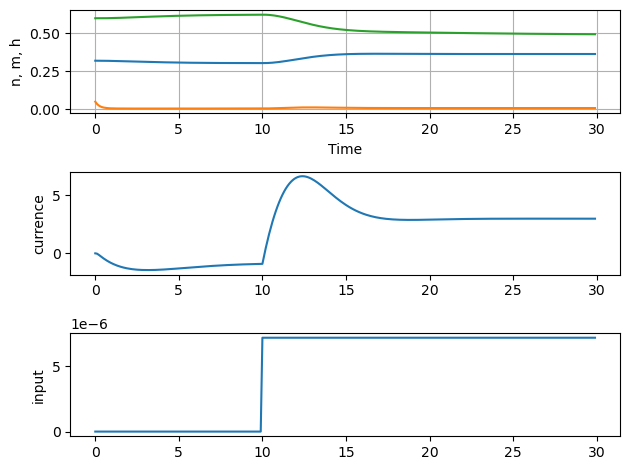

In [102]:
fig, axs = plt.subplots(3, 1)
axs[0].plot(states.t / ms, states.n[0], states.t / ms, states.m[0], states.t / ms, states.h[0])
axs[0].set_xlabel('Time')
axs[0].set_ylabel('n, m, h')
axs[0].grid(True)

axs[1].plot(states.t / ms, states.v[0]/ mV)
axs[1].set_ylabel('currence')

axs[2].plot(states.t / ms, states.I_e[0]/ amp)
axs[2].set_ylabel('input')

fig.tight_layout()
plt.show()